


# Day 34

## Clustering

### KMeans

In [1]:
# Trying out the Sklearn Clustering tools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
style.use('ggplot')

# Creating a random data
X = np.array([[1,3],
             [1,5],
             [1.5,1.8],
             [5,8],
             [4,6],
             [8,8],
             [9,10],
             [7,8.5],
             [2,7],
             [1,0.6],
             [9,11],])



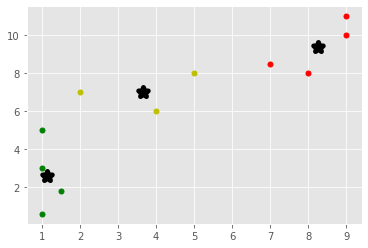

In [3]:
# Initializing and instantiating the KMeans Object

clf = KMeans(n_clusters=3).fit(X)
colors = ['g.', 'r.', 'y.', 'k.', 'b.', 'c.']

centroids = clf.cluster_centers_     #gets the centroids
labels = clf.labels_                 #gets the class

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, linewidths=5, c='k')

# Day 35

#### Handling Non-Numeric Data Using the Titanic Dataset

In [4]:
'''
    ___### The Titanic Data Description:
    *Features:
        Pclass - Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)
        Survived - Survival _0=No, 1=Yes
        Name - Name
        Sex - Sex
        
    
'''

df = pd.read_csv('titanic_train.csv')
#print(df.head(6))

# Droping some columns which can possibly taint our model

df.drop(['Name'], axis=1, inplace=True)
df.fillna(0, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,0,S


In [5]:
####
#  Handling non numerical data

def handle_non_numerical_data(df):
    
    # handling non-numerical data: must convert.
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        #print(column, df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            #great, found them
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new id per unique string
                    text_digit_value[unique] = x
                    x += 1
                    
            # now we map the new "id" value
            # to replace the string
            df[column] = list(map(convert_to_int, df[column]))
            
    return df

# Day 37 - 38

### Coding the KMeans Algorithm form scratch

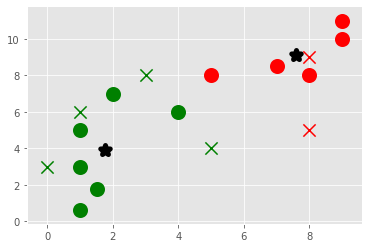

In [6]:
#
#
#
#
#
#
#
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('ggplot')


class K_Means:
    def __init__( self, k=2, tol=0.001, max_iter=300 ):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        
    
    def fit( self, data ):
        
        self.centroids = {}
        
        for i in range( self.k ):
            self.centroids[i] = data[i]
            
        for i in range( self.max_iter ):
            self.classifications = {}
            
            for i in range( self.k ):
                self.classifications[i] = []
            
            for feature_set in data:
                distances = [ np.linalg.norm( feature_set - self.centroids[centroid] ) for centroid in self.centroids ]
                classification = distances.index( min(distances) )
                self.classifications[ classification ].append( feature_set )
                
            prev_centroids = dict( self.centroids )
            
            for classification in self.classifications:
                self.centroids[ classification ] = np.average( self.classifications[classification], axis=0 )
                
            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum( ( current_centroid - original_centroid ) / original_centroid*100. ) > self.tol:
                    optimized = False
                    
            if optimized:
                break
    
    def predict( self, data ):
        distances = [ np.linalg.norm( data - self.centroids[ centroid ]) for centroid in self.centroids ]
        classification = distances.index( min(distances) )
        return classification

# Creating a random data
data_set = np.array( [[1,3],
             [1,5],
             [1.5,1.8],
             [5,8],
             [4,6],
             [8,8],
             [9,10],
             [7,8.5],
             [2,7],
             [1,0.6],
             [9,11],] )
colors = ['g', 'r', 'y', 'k', 'b', 'c']

# Initializing and fitting
clf = K_Means()
clf.fit(data_set)

for centroid in clf.centroids:
    plt.scatter( clf.centroids[centroid][0], clf.centroids[centroid][1],
                 marker='*', color='k', s=100, linewidths=5 )
    
for classification in clf.classifications:
    color = colors[ classification ]
    for feature_set in clf.classifications[ classification ]:
        plt.scatter( feature_set[0], feature_set[1], marker='o',
                     color=color, s=100, linewidths=5 )
        
# To test on unknown data

unknowns = np.array( [[8,5],
                     [8,9],
                     [0,3],
                     [5,4],
                     [3,8],
                     [1,6],] )

for unknown in unknowns:
    classification = clf.predict( unknown )
    plt.scatter( unknown[0], unknown[1], marker='x',
                 color=colors[classification], s=150, linewidths=5)

# Day 39 - 40

## Mean Shift

C:\Users\NGabriel\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


[[ 4.89063645  5.0657979   4.93301352]
 [ 3.04597257 10.09097706 10.00533215]
 [ 1.06240183  0.86587671  1.01906829]]
Number of estimated clusters:  3


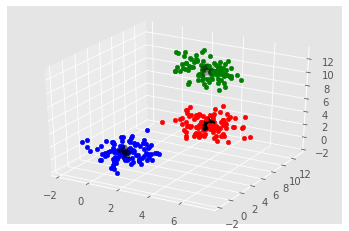

In [7]:
########################
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
style.use('ggplot')
%matplotlib inline


centers = [ [1,1,1],
          [5,5,5],
          [3,10,10] ]
X, _ = make_blobs( n_samples=300, centers=centers, cluster_std=1 )

ms = MeanShift()
ms.fit( X )
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print( cluster_centers )
n_clusters_ = len( np.unique(labels) )
print( "Number of estimated clusters: ", n_clusters_ )

colors = 10*[ 'r', 'g', 'b', 'c', 'k', 'y', 'm' ]
fig = plt.figure()
ax = fig.add_subplot( 111, projection='3d' )

for i in range( len(X) ):
    ax.scatter( X[i][0], X[i][1], X[i][2], c=colors[ labels[i] ], marker='o' )
    
ax.scatter( cluster_centers[:,0], cluster_centers[:,1], cluster_centers[:,2],
            marker='*', color='k', s=100, linewidths=5, zorder=10 )

# Day 41

### Mean Shift from scratch

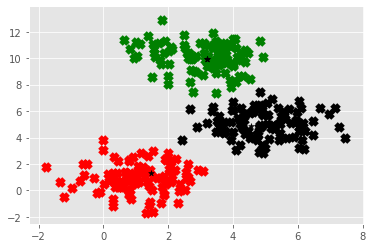

In [12]:
#
#
#
#
#
class Mean_Shift:
    def __init__(self, radius=None, radius_norm_step=100):
        self.radius = radius
        self.radius_norm_step = radius_norm_step
        
    def fit(self, data):
        
        if self.radius == None:
            all_data_centroid = np.average(data, axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.radius = all_data_norm / self.radius_norm_step
            
        centroids = {}
        
        for i in range(len(data)):
            centroids[i] = data[i]
            
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                
                weights = [i for i in range(self.radius_norm_step)][::-1]
                
                for feature_set in data:
                    distance = np.linalg.norm(feature_set-centroid)
                    if distance == 0:
                        distance = 0.00000001
                    weight_index = int(distance/self.radius)
                    
                    if weight_index > self.radius_norm_step-1:
                        weight_index = self.radius_norm_step-1
                    
                    to_add = (weights[weight_index]**2)*[feature_set]
                    in_bandwidth+=to_add

                        
                new_centroid = np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))
                
            uniques = sorted(list(new_centroids))
            
            to_pop = []
            
            for i in uniques:
                for ii in uniques:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i)-np.array(ii)) <= self.radius:
                        to_pop.append(ii)
                        break 
                
            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass
                
            
            prev_centroids = dict(centroids)
            
            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])
                
            optimized = True
            
            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                    
            if optimized:
                break
        
        self.centroids = centroids
        
        self.classifications = {}
        for i in range(len(self.centroids)):
            self.classifications[i] = []
            
        for feature_set in data:
            distances = [np.linalg.norm(feature_set-self.centroids[centroid]) for centroid in self.centroids]
            classification = distances.index(min(distances))
            self.classifications[classification].append(feature_set)
        
    def predict(self, data):
        distances = [np.linalg.norm(feature_set-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
        


data = data_set.copy()
clf = Mean_Shift()
clf.fit(X)

centroids = clf.centroids

for classification in clf.classifications:
    color = colors[classification]
    for feature_set in clf.classifications[classification]:
        plt.scatter(feature_set[0], feature_set[1], marker='x', color=color, s=50, linewidth=5)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*')